In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [83]:
df = pd.read_csv('Blodgett_out.csv')

In [84]:
df

,Reach,DateTime,elev,width,D50,slope,yield
0,upstream,2010-04-01 00:00,1393.92,0.0,44.156366,0.003854,0.0
1,upstream,2010-04-01 01:00,1393.92,0.0,44.155616,0.003854,0.0
2,upstream,2010-04-01 02:00,1393.92,0.0,44.155616,0.003854,0.0
3,upstream,2010-04-01 03:00,1393.92,0.0,44.155616,0.003854,0.0
4,upstream,2010-04-01 04:00,1393.92,0.0,44.155616,0.003854,0.0
...,...,...,...,...,...,...,...
160825,feeder,2020-07-31 18:00,0.00,0.0,0.000000,0.000000,0.0
160826,feeder,2020-07-31 19:00,0.00,0.0,0.000000,0.000000,0.0
160827,feeder,2020-07-31 20:00,0.00,0.0,0.000000,0.000000,0.0
160828,feeder,2020-07-31 21:00,0.00,0.0,0.000000,0.000000,0.0


In [85]:
upstream = df[df['Reach']=='upstream']
df_us = df[df['Reach']=='deposit_upstream']
df_ds = df[df['Reach']=='deposit_downstream']
downstream = df[df['Reach']=='downstream']

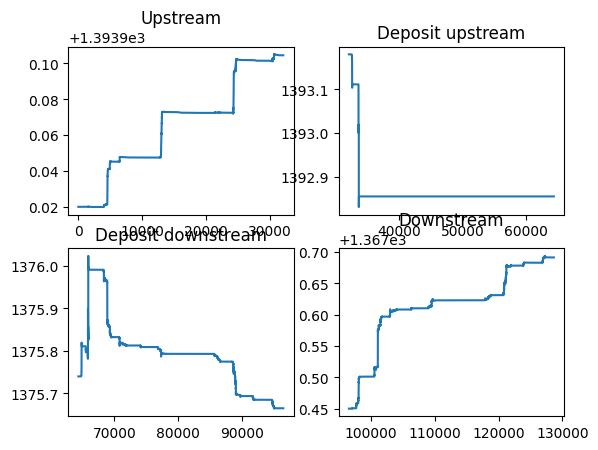

In [86]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['elev'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['elev'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['elev'])
ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['elev'])
ax[1,1].set_title('Downstream')
plt.show()

Text(0.5, 1.0, 'Downstream')

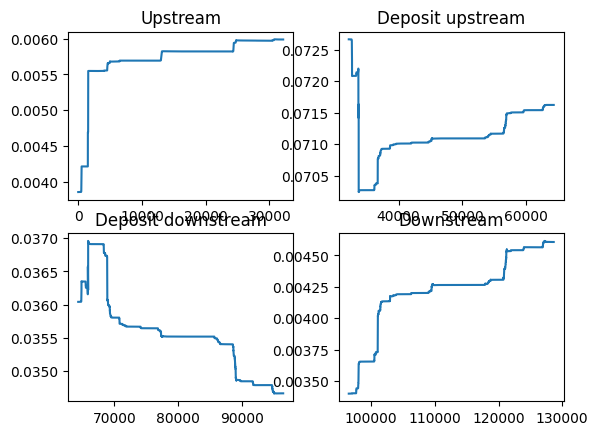

In [87]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['slope'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['slope'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['slope'])
ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['slope'])
ax[1,1].set_title('Downstream')

Text(0.5, 1.0, 'Downstream')

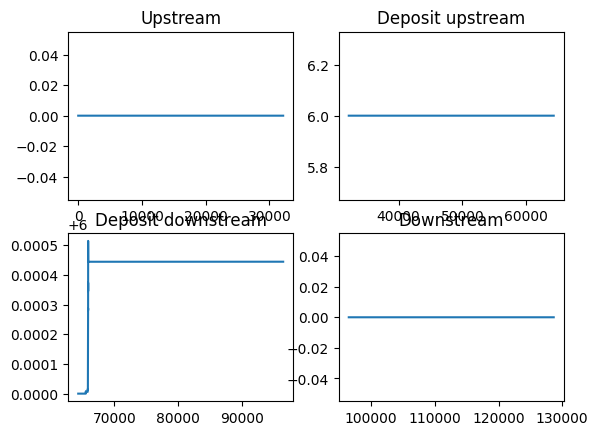

In [88]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['width'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['width'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['width'])
ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['width'])
ax[1,1].set_title('Downstream')

Text(0.5, 1.0, 'Downstream')

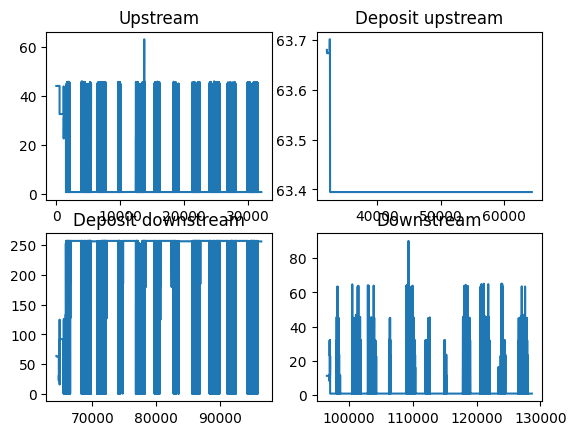

In [89]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['D50'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['D50'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['D50'])

ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['D50'])
ax[1,1].set_title('Downstream')

In [90]:
print(downstream['yield'].sum())

556102.4377886367


<Axes: >

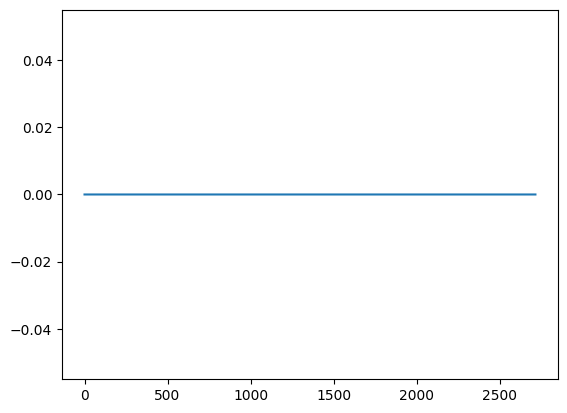

In [10]:
upstream['yield'].plot()

<Axes: >

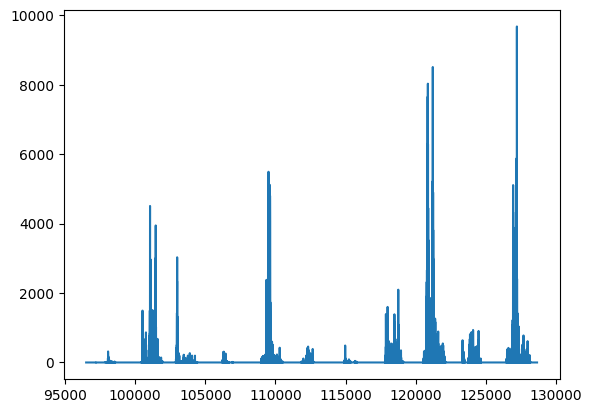

In [42]:
downstream['yield'].plot()

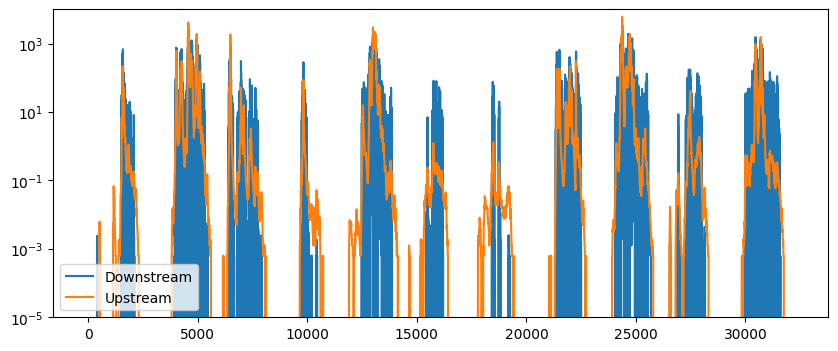

In [91]:
df_f = df[df['Reach'] == 'feeder']
df_f.reset_index(inplace=True)
downstream_r = downstream.reset_index()
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(downstream_r['yield'], label='Downstream')
ax.plot(df_f['yield'], label='Upstream')
ax.set_yscale('log')
ax.set_ylim((1e-5, 1e4))
plt.legend(loc='lower left')
plt.show()

In [15]:
start = None
end = None
for i in downstream.index:
    if downstream.loc[i, 'DateTime'] == '2002-04-01 00:00':
        start = i
    if downstream.loc[i, 'DateTime'] == '2002-07-31 22:00':
        end = i
        
print(start, end)

165321 168246


In [16]:
totyield = 0
for i in range(165321, 168247):
    totyield += downstream.loc[i, 'yield']
print(totyield)

921919.1083266385


downstream yield
2012: 914679 kg
2015: 193617
2018: 2195623 
2019: 435761
2020: 1319620 

In [20]:
for i in df_ds.index:
    if df_ds.loc[i, 'DateTime'] == '2021-07-31 00:00':
        print(df_ds.loc[i])

Reach       deposit_downstream
DateTime      2021-07-31 00:00
elev               1744.565202
width                 4.816041
D50                  87.389701
slope                 0.047996
yield                 0.018815
Name: 93487, dtype: object


In [74]:
df_ds

,Reach,DateTime,elev,width,D50,slope,yield
64332,deposit_downstream,2010-04-01 00:00,1375.74000,6.00000,63.680265,0.036043,0.0
64333,deposit_downstream,2010-04-01 01:00,1375.74000,6.00000,63.522646,0.036043,0.0
64334,deposit_downstream,2010-04-01 02:00,1375.74000,6.00000,63.378327,0.036043,0.0
64335,deposit_downstream,2010-04-01 03:00,1375.74000,6.00000,63.240293,0.036043,0.0
64336,deposit_downstream,2010-04-01 04:00,1375.74000,6.00000,63.107937,0.036043,0.0
...,...,...,...,...,...,...,...
96493,deposit_downstream,2020-07-31 18:00,1376.56939,6.00011,256.401045,0.036442,0.0
96494,deposit_downstream,2020-07-31 19:00,1376.56939,6.00011,256.401045,0.036442,0.0
96495,deposit_downstream,2020-07-31 20:00,1376.56939,6.00011,256.401045,0.036442,0.0
96496,deposit_downstream,2020-07-31 21:00,1376.56939,6.00011,256.401045,0.036442,0.0
